# Bayesian Analysis

In [1]:
# Data massaging for afternoon messy data
import time
import pandas

start_date = '10/20/2016'
end_date = '9/3/2017'

df = pandas.read_csv('./combined_new.csv')

start_date_unix = time.mktime(time.strptime(start_date, '%m/%d/%Y'))
end_date_unix = time.mktime(time.strptime(end_date, '%m/%d/%Y'))

## only look at data before patient is on continuous insulin supply
df = df[pandas.notnull(df['correcttimestamp'])]


df['unixtime'] = df['correcttimestamp'].apply(lambda x: time.mktime(time.strptime(x, '%m/%d/%Y %H:%M:%S')))
df = df[(df['unixtime'] >= start_date_unix) & (df['unixtime'] <= end_date_unix)]

## Hours of the day
def chunk_time(hour):
    ## 12am - 4am night
    ## 4am- 8am early morning
    ## 8am - 12pm morning
    ## 12pm - 4pm afternoon
    ## 4pm - 8pm evening
    ## 8pm - 12am late evening
    time_chunk = 0
    if (hour >= 24 and hour < 4):
        time_chunk = 0
    if (hour >= 4 and hour < 8):
        time_chunk = 1
    if (hour >= 8 and hour < 12):
        time_chunk = 2
    if (hour >= 12 and hour < 16):
        time_chunk = 3
    if (hour >= 16 and hour < 20):
        time_chunk = 4
    if (hour >= 20 and hour < 24):
        time_chunk = 5
    return time_chunk

def chunk_meals(meal):
    meal_chunk = 4
    if (meal == 'breakfast'):
        meal_chunk = 0
    if (meal == 'lunch'):
        meal_chunk = 1
    if (meal == 'dinner'):
        meal_chunk = 2
    if (meal == 'sugar to treat'):
        meal_chunk = 3
    return meal_chunk

df['time_chunk'] = df['hour'].apply(lambda x: chunk_time(x))
df['meal_chunk'] = df['meal'].apply(lambda x: chunk_meals(x))
df 


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


,date,datetext,time,hour,type,caregiver,timestamp,username,justnow,time.1,...,carbratiolunch,carbratiosnack,carbratiodinner,carbratiobedtime,corrfactday,corrfactnight,lantus.1,unixtime,time_chunk,meal_chunk
615,9/2/2017,09/02/2017,10:16 pm,22,night,mom,9/2/2017 22:16:54,kds,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504391e+09,5,4
616,9/2/2017,09/02/2017,08:24 pm,20,bedtime snack,dad,9/2/2017 20:24:49,cds,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504384e+09,5,4
617,9/2/2017,09/02/2017,06:45 pm,19,dinner,mom,9/2/2017 18:45:18,kds,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504378e+09,4,2
618,9/2/2017,09/02/2017,06:30 pm,19,sugar to treat,dad,9/2/2017 18:30:20,cds,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504377e+09,4,3
619,9/2/2017,09/02/2017,04:52 pm,17,NaN,dad,9/2/2017 16:52:11,cds,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504371e+09,4,4
620,9/2/2017,09/02/2017,01:12 pm,13,lunch,dad,9/2/2017 16:55:56,cds,NaN,1:12:00 pm,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504358e+09,3,1
621,9/2/2017,09/02/2017,10:00 am,10,NaN,laurie,9/2/2017 10:00:39,gma,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504346e+09,2,4
622,9/2/2017,09/02/2017,07:41 am,8,breakfast,laurie,9/2/2017 7:41:33,gma,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504338e+09,2,0
623,9/2/2017,09/02/2017,06:51 am,7,NaN,laurie,9/2/2017 6:51:41,gma,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504335e+09,1,4
624,9/2/2017,09/02/2017,03:03 am,3,nightearly,laurie,9/2/2017 3:03:09,gma,yes,NaN,...,30.0,30.0,40.0,40.0,125.0,120.0,8.0,1.504321e+09,0,4


In [2]:
cleaned_df = pandas.DataFrame(columns=
                              ['date','unixtime', 'lantus',
                               'current_meal',
                               'time_diff_last_humalog', 
                               'time_diff_last_mealcarbs', 
                               'last_humalog', 
                               'last_humalog_time_chunk',
                               'last_mealcarbs', 
                               'last_mealcarbs_time_chunk',
                               'last_mealcarbs_meal',
                               'last_mealcarbs_meal_chunk',
                               'glucose_diff'])
df = df.sort_values(['unixtime'])

## iterate through the rows

last_humalog = None
last_humalog_time = None
last_humalog_time_chunk = None
last_glucose = None
last_glucose_time = None
last_mealcarbs = None
last_mealcarbs_time = None
last_mealcarbs_time_chunk = None
last_mealcarbs_meal = None
last_mealcarbs_meal_chunk = None
res = []
for idx, row in df.iterrows():
    ## We have a glucose measurement so collect all previous humalog/mealcarb
    if not pandas.isnull(row['glucose']):
        ##check the last mealcarb/humalog if exists
        if last_glucose:
            # write the row to cleaned_df
            time_diff_last_mealcarbs, time_diff_last_humalog = None, None
            if (last_humalog_time):
                time_diff_last_humalog = (row['unixtime'] - last_humalog_time) / 60 
            if (last_mealcarbs_time):
                time_diff_last_mealcarbs = (row['unixtime'] - last_mealcarbs_time) / 60 
            glucose_diff = row['glucose'] - last_glucose
            if time_diff_last_humalog and time_diff_last_mealcarbs:
                new = {
                    'date': row['date'],
                    'lantus': row['lantus.1'],
                    'current_meal': row['meal'],
                    'unixtime': row['unixtime'],
                    'time_diff_last_glucose': (row['unixtime'] - last_glucose_time) /60 if last_glucose_time else 0,
                    'time_diff_last_humalog': time_diff_last_humalog if time_diff_last_humalog else 0,
                    'time_diff_last_mealcarbs': time_diff_last_mealcarbs if time_diff_last_mealcarbs else 0,
                    'last_humalog': last_humalog if last_humalog else 0,
                    'last_humalog_time_chunk': last_humalog_time_chunk,
                    'last_mealcarbs': last_mealcarbs if last_mealcarbs else 0,
                    'last_mealcarbs_time_chunk': last_mealcarbs_time_chunk if last_mealcarbs_time_chunk else 0, 
                    'last_mealcarbs_meal': last_mealcarbs_meal,
                    'last_mealcarbs_meal_chunk': last_mealcarbs_meal_chunk,
                    'glucose_diff': glucose_diff
                }
                res.append(new)
            
        last_glucose = row['glucose']
        last_glucose_time = row['unixtime'] if last_glucose else None
        last_glucose_time_chunk = row['time_chunk']
    
    #set humalog and mealcarb to this humalog time
    if (not pandas.isnull(row['humalog'])):
        last_humalog = row['humalog']
        last_humalog_time = row['unixtime']
        last_humalog_time_chunk = row['time_chunk']
    if (not pandas.isnull(row['mealcarbs'])):
        last_mealcarbs = row['mealcarbs']
        last_mealcarbs_meal = row['meal']
        last_mealcarbs_time = row['unixtime']
        last_mealcarbs_time_chunk = row['time_chunk']
        last_mealcarbs_meal_chunk = row['meal_chunk']
    
cleaned_df = cleaned_df.append(res)
cleaned_df = cleaned_df[cleaned_df['time_diff_last_mealcarbs'] < 240]

cleaned_df

,current_meal,date,glucose_diff,lantus,last_humalog,last_humalog_time_chunk,last_mealcarbs,last_mealcarbs_meal,last_mealcarbs_meal_chunk,last_mealcarbs_time_chunk,time_diff_last_glucose,time_diff_last_humalog,time_diff_last_mealcarbs,unixtime
3,dinner,10/21/2016,83.0,2.0,0.50,4.0,32.0,snack,4.0,4.0,199.000000,199.000000,199.000000,1.477078e+09
6,lunch,10/22/2016,133.0,2.0,1.00,2.0,57.0,breakfast,0.0,2.0,196.000000,196.000000,196.000000,1.477138e+09
7,snack,10/22/2016,-103.0,2.0,1.50,3.0,39.0,lunch,1.0,3.0,199.000000,199.000000,199.000000,1.477150e+09
8,dinner,10/22/2016,-14.0,2.0,1.00,3.0,34.0,snack,4.0,3.0,220.000000,220.000000,220.000000,1.477163e+09
11,lunch,10/23/2016,181.0,3.0,1.00,2.0,50.0,breakfast,0.0,2.0,185.000000,185.000000,185.000000,1.477226e+09
12,exercise snack,10/23/2016,-189.0,3.0,2.50,3.0,72.0,lunch,1.0,3.0,100.000000,100.000000,100.000000,1.477232e+09
13,NaN,10/23/2016,55.0,3.0,2.50,3.0,14.0,exercise snack,4.0,3.0,70.000000,170.000000,70.000000,1.477236e+09
14,snack,10/23/2016,61.0,3.0,2.50,3.0,14.0,exercise snack,4.0,3.0,55.000000,225.000000,125.000000,1.477239e+09
15,dinner,10/23/2016,-95.0,3.0,1.50,4.0,22.0,snack,4.0,4.0,190.000000,190.000000,190.000000,1.477251e+09
18,lunch,10/24/2016,125.0,3.5,0.50,2.0,37.0,breakfast,0.0,2.0,220.000000,220.000000,220.000000,1.477310e+09


In [3]:
sugar_to_treat = cleaned_df[(cleaned_df['last_mealcarbs_meal'] == 'sugar to treat')]

#breakfast_lunch = breakfast_lunch[(breakfast_lunch['date'] > '10/24/2016') & (breakfast_lunch['date'] < '12/4/2016') & (breakfast_lunch['glucose_diff'] < 178)]
#breakfast_lunch = breakfast_lunch[:50]
#breakfast_lunch


# Only Breakfast-Lunch

In [4]:
sugar_to_treat[(sugar_to_treat['time_diff_last_humalog'] - sugar_to_treat['time_diff_last_glucose']) > 180]
#impute the effective humalog assuming that total_asborbtion happens after 240 minutes
#amount that has been absorbed
time_absorb_humalog = 240
percent_absorbed_at_glucose = (sugar_to_treat['time_diff_last_humalog'] - sugar_to_treat['time_diff_last_glucose']) / time_absorb_humalog
percent_absorbed_at_glucose
percent_remaining = 1 - percent_absorbed_at_glucose
percent_remaining = percent_remaining.map(lambda x: max(x, 0))

humalog_acting = percent_remaining * sugar_to_treat['last_humalog'] / (time_absorb_humalog - (sugar_to_treat['time_diff_last_humalog'] - sugar_to_treat['time_diff_last_glucose']))
humalog_acting = humalog_acting.map(lambda x: max(x, 0))
sugar_to_treat['time_diff_last_humalog_last_glucose'] = sugar_to_treat['time_diff_last_humalog'] - sugar_to_treat['time_diff_last_glucose']

sugar_to_treat.count()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


current_meal                            86
date                                   136
glucose_diff                           136
lantus                                 136
last_humalog                           136
last_humalog_time_chunk                136
last_mealcarbs                         136
last_mealcarbs_meal                    136
last_mealcarbs_meal_chunk              136
last_mealcarbs_time_chunk              136
time_diff_last_glucose                 136
time_diff_last_humalog                 136
time_diff_last_mealcarbs               136
unixtime                               136
time_diff_last_humalog_last_glucose    136
dtype: int64

In [12]:
from pymc3 import *
import theano.tensor as T
import matplotlib.pyplot as plt
%matplotlib inline

mealcarbs = sugar_to_treat['last_mealcarbs'][:10]
humalog = sugar_to_treat['last_humalog'][:10]
glucose_diff = sugar_to_treat['glucose_diff'][:10]
basal_given = sugar_to_treat['lantus'][:10]
timediff_last_mealcarbs = sugar_to_treat['time_diff_last_mealcarbs'][:10]
timediff_last_glucose = sugar_to_treat['time_diff_last_glucose'][:10]
timediff_last_humalog_last_glucose = sugar_to_treat['time_diff_last_humalog_last_glucose'][:10]

import theano.tensor as T

# Assume that basal insulin is accurate dosage (this is a large assumption),
# We can try and incorporate this later with another variable.
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('intercept', 0, sd=10)

    time_of_absorb_carbs = Bound(Normal, lower=0.0)('time_of_absorb_carbs', mu=40.0, sd=20)

    time_of_absorb_humalog = Uniform('time_of_absorb_humalog', lower=180, upper=240)
    BoundedNormal = Bound(Normal, lower=0.0)

    CR = Uniform('CR',lower=0, upper=60)
    CF = Uniform('CF', lower=0, upper=200)

    percent_absorb_carbs = T.minimum(timediff_last_mealcarbs, time_of_absorb_carbs) / time_of_absorb_carbs

    #percent absorb humalog
    percent_left_absorb_humalog = T.maximum((time_of_absorb_humalog - timediff_last_humalog_last_glucose)/time_of_absorb_humalog, 0)
    percent_absorb_humalog = percent_left_absorb_humalog * timediff_last_glucose / (time_of_absorb_humalog - timediff_last_humalog_last_glucose)

    basal_actual = Normal('basal_actual', mu=6, sd=2)

    # Define likelihood
    likelihood = Normal('glucose_diff', mu=intercept + CF/CR * percent_absorb_carbs * mealcarbs \
                        - CF * percent_absorb_humalog * humalog \
                        + CF *.8* (basal_actual - basal_given) * 1/(24*60) * timediff_last_glucose
                        ,sd=sigma, observed=glucose_diff)
    
    # Inference!
    trace = sample(6000, tune=2000, progressbar=True) # draw posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [basal_actual, CF_interval__, CR_interval__, time_of_absorb_humalog_interval__, time_of_absorb_carbs_lowerbound__, intercept, sigma_log__]
100%|██████████| 8000/8000 [00:53<00:00, 149.23it/s]
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


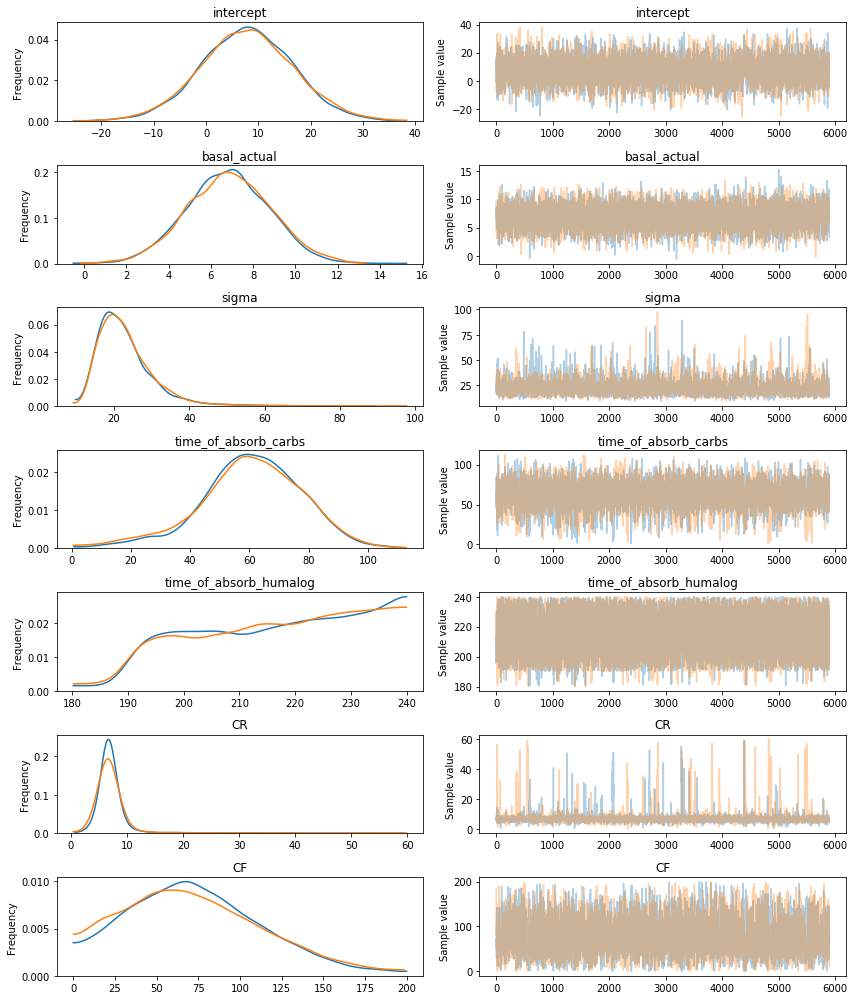

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee65c3d780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fee68fc4898>], dtype=object)

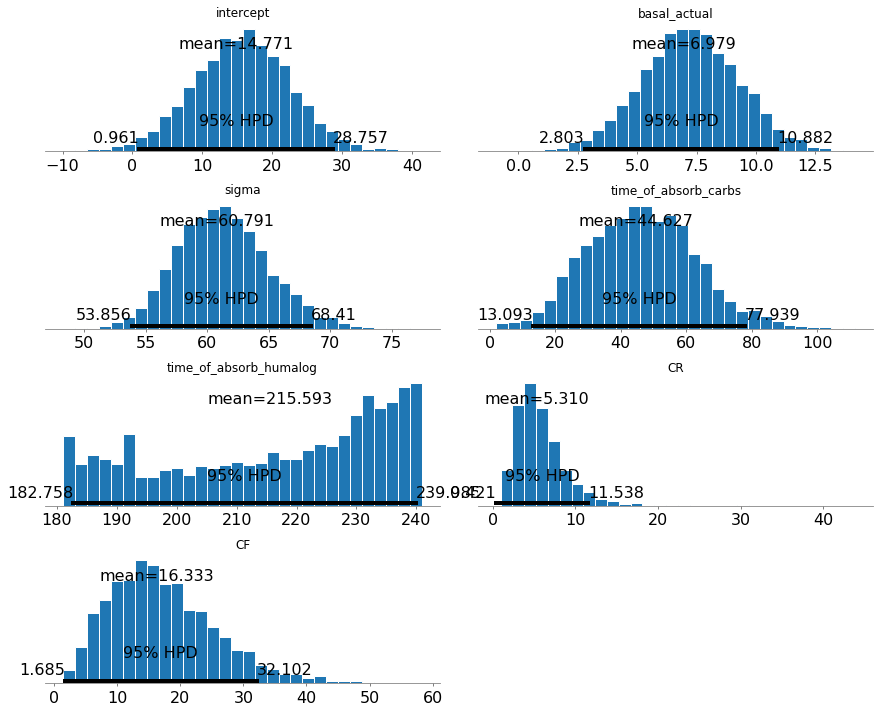

In [314]:
plot_posterior(trace[100:])